In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ML mini project /IoT-SDN IDS.csv')

In [4]:
data.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,0,0,0,116223817,10,0,0,0,0,0,...,0,45.000000,0.000000,45,45,2.117174e+14,5.988273e+14,1.693739e+15,6.143989e+06,Probe
1,0,0,0,113920039,14,0,0,0,0,0,...,0,44.333333,36.412452,98,1,2.419628e+14,6.401733e+14,1.693739e+15,6.143862e+06,Probe
2,38935,80,6,1237,5,2,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,Probe
3,38935,80,6,34,1,1,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,Probe
4,33547,80,6,3400,5,2,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,Probe


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539573 entries, 0 to 539572
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Src Port                    539573 non-null  int64  
 1   Dst Port                    539573 non-null  int64  
 2   Protocol                    539573 non-null  int64  
 3   Flow Duration               539573 non-null  int64  
 4   Total Fwd Packet            539573 non-null  int64  
 5   Total Bwd packets           539573 non-null  int64  
 6   Total Length of Fwd Packet  539573 non-null  int64  
 7   Total Length of Bwd Packet  539573 non-null  int64  
 8   Fwd Packet Length Max       539573 non-null  int64  
 9   Fwd Packet Length Min       539573 non-null  int64  
 10  Fwd Packet Length Mean      539573 non-null  float64
 11  Fwd Packet Length Std       539573 non-null  float64
 12  Bwd Packet Length Max       539573 non-null  int64  
 13  Bwd Packet Len

In [6]:
data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,539573.000000,539573.000000,539573.000000,5.395730e+05,5.395730e+05,5.395730e+05,539573.000000,5.395730e+05,539573.000000,539573.000000,...,539573.000000,539573.000000,5.395730e+05,5.395730e+05,5.395730e+05,5.395730e+05,5.395720e+05,5.395720e+05,5.395730e+05,5.395730e+05
mean,34083.431767,1579.435956,11.542144,4.312951e+07,4.874807e+01,1.042658e+01,52.361406,4.593741e+02,4.491405,1.935582,...,0.157930,18.386524,6.371870e+04,6.588971e+04,1.404611e+05,2.200130e+04,1.542422e+15,1.254063e+14,1.693558e+15,1.469612e+15
std,17438.873436,3625.702126,5.912992,4.015146e+07,6.996834e+03,6.994955e+03,2220.509200,1.141721e+05,58.760920,9.183936,...,5.571206,14.296152,4.084231e+05,4.028763e+05,7.796379e+05,3.035468e+05,3.947373e+14,3.278709e+14,5.685483e+11,5.739261e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.302873e+14,0.000000e+00,1.692020e+15,5.000001e+06
25%,21839.000000,0.000000,6.000000,1.300000e+01,2.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15
50%,37375.000000,0.000000,17.000000,4.314426e+07,1.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.693768e+15,0.000000e+00,1.693768e+15,1.693768e+15
75%,45417.000000,1419.000000,17.000000,6.734013e+07,5.000000e+01,2.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.693768e+15,0.000000e+00,1.693768e+15,1.693768e+15
max,65535.000000,65389.000000,17.000000,1.200000e+08,5.139369e+06,5.138003e+06,261564.000000,4.207908e+07,4200.000000,376.000000,...,568.000000,40.000000,2.073945e+07,1.421868e+07,3.379450e+07,2.073945e+07,1.693910e+15,1.197775e+15,1.693910e+15,1.693910e+15


In [7]:
data.describe(include='object')

,Attack
count,539573
unique,16
top,DOS-UDP
freq,326738


In [8]:
data.shape

(539573, 80)

In [9]:
data.isnull().sum()

Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           1
Idle Std            1
Idle Max            0
Idle Min            0
Attack              0
Length: 80, dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Attack              0
Length: 80, dtype: int64

In [12]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 2


In [13]:
data = data.drop_duplicates()

In [14]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='Attack', ylabel='count'>

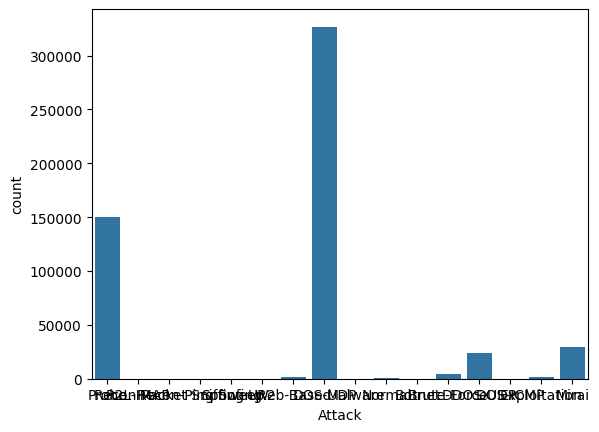

In [15]:
sns.countplot(x=data['Attack'])

In [16]:
# prompt: give percentage of all attacks

total_attacks = len(data)
attack_counts = data['Attack'].value_counts()
for attack, count in attack_counts.items():
  percentage = (count / total_attacks) * 100
  print(f"{attack}: {percentage:.5f}%")


DOS-UDP: 60.57479%
Probe: 27.82427%
Mirai: 5.46370%
DDOS-UDP: 4.37656%
Brute-Force: 0.89508%
Exploitation: 0.31220%
Web-Based: 0.27883%
Normal: 0.18187%
UR2: 0.03560%
Malware: 0.02392%
Botnet: 0.01168%
Recon-Ping Sweep: 0.01112%
R2L-IMAP: 0.00686%
Spoofing: 0.00222%
Recon-Packet Sniffing: 0.00093%
DOS-ICMP: 0.00037%


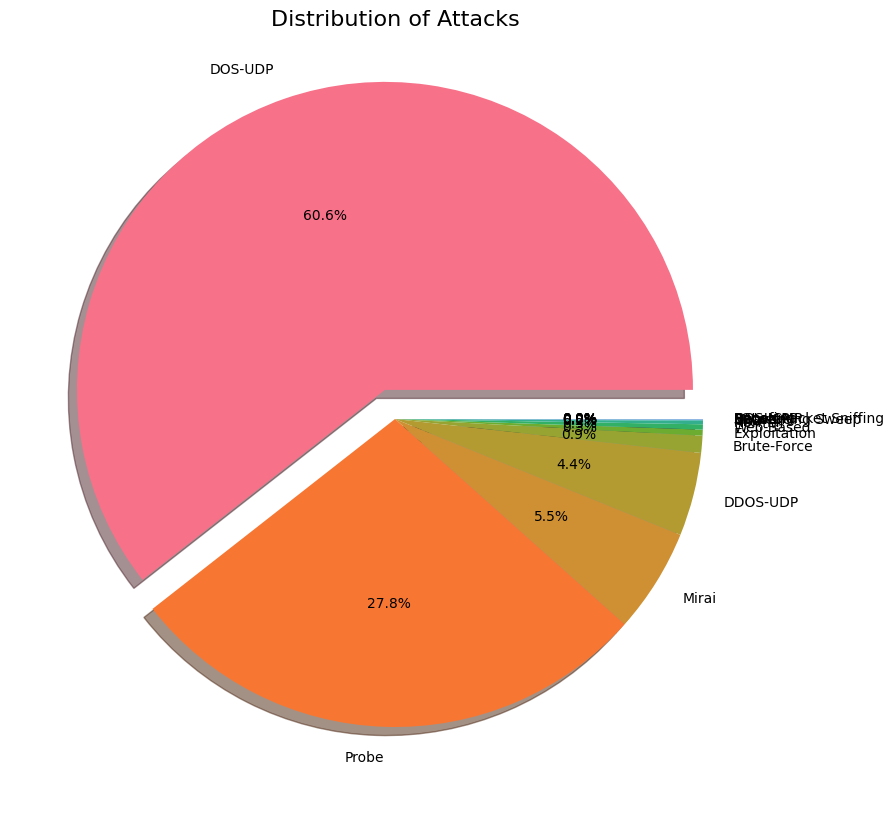

In [17]:
# prompt: give a pie chart for the above for good visibility

plt.figure(figsize=(15, 10))
labels = data['Attack'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))
explode = [0.1] + [0] * (len(labels) - 1)
plt.pie(data['Attack'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Distribution of Attacks', fontsize=16)
plt.show()

In [18]:
print('Attack distribution across the Training dataset:')
print(data['Attack'].value_counts())

Attack distribution across the Training dataset:
Attack
DOS-UDP                  326738
Probe                    150083
Mirai                     29471
DDOS-UDP                  23607
Brute-Force                4828
Exploitation               1684
Web-Based                  1504
Normal                      981
UR2                         192
Malware                     129
Botnet                       63
Recon-Ping Sweep             60
R2L-IMAP                     37
Spoofing                     12
Recon-Packet Sniffing         5
DOS-ICMP                      2
Name: count, dtype: int64


In [19]:
def le(data):
  for col in data.columns:
    if data[col].dtype == 'object':
      label_encoder=LabelEncoder()
      data[col]= label_encoder.fit_transform(data[col])

le(data)

In [20]:
import pandas as pd
import numpy as np

if pd.api.types.is_numeric_dtype(data):
    print(data[np.isinf(data) | np.isnan(data)])  # Check for infinities and NaNs
else:
    print("X is not a numeric DataFrame")


X is not a numeric DataFrame


In [21]:
data = data.replace([np.inf, -np.inf], 1e300)  # Replace with a large positive value

In [22]:
data = np.clip(data, -1e30, 1e30)  # Cap values between -1e30 and 1e30

In [23]:
X_train = data.drop(['Attack'],axis=1)
Y_train = data['Attack']

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [25]:
import pandas as pd
import numpy as np

# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Choose a handling method for the NaN values:
# Option 1: Remove rows with NaN
data.dropna(inplace=True)


In [26]:
data

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,0,0,0,116223817,10,0,0,0,0,0,...,0,45.000000,0.000000,45,45,2.117174e+14,5.988273e+14,1.693739e+15,6.143989e+06,9
1,0,0,0,113920039,14,0,0,0,0,0,...,0,44.333333,36.412452,98,1,2.419628e+14,6.401733e+14,1.693739e+15,6.143862e+06,9
2,38935,80,6,1237,5,2,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,9
3,38935,80,6,34,1,1,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,9
4,33547,80,6,3400,5,2,0,0,0,0,...,32,0.000000,0.000000,0,0,1.693740e+15,0.000000e+00,1.693740e+15,1.693740e+15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539568,35615,53,17,491509,1,1,45,102,45,45,...,8,0.000000,0.000000,0,0,1.693826e+15,0.000000e+00,1.693826e+15,1.693826e+15,7
539569,55616,53,17,509970,1,1,44,103,44,44,...,8,0.000000,0.000000,0,0,1.693825e+15,0.000000e+00,1.693825e+15,1.693825e+15,7
539570,32877,23,6,375309,1,1,0,0,0,0,...,20,0.000000,0.000000,0,0,1.693826e+15,0.000000e+00,1.693826e+15,1.693826e+15,7
539571,33321,53,17,377541,1,1,43,111,43,43,...,8,0.000000,0.000000,0,0,1.693825e+15,0.000000e+00,1.693825e+15,1.693825e+15,7


In [27]:
object_attributes =['Src Port','Dst Port','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','FIN Flag Count','SYN Flag Count','RST Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count','CWR Flag Count','ECE Flag Count']
for i in object_attributes:
  data[i]=data[i].astype('object')

data['Attack']=data['Attack'].astype('category')

In [28]:
columns_to_exclude=['Src Port','Dst Port','Attack']
selected_columns=[col for col in data.columns if col not in columns_to_exclude]
selected_columns

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 

In [29]:
def le(data):
  for col in data.columns:
    if data[col].dtype == 'object':
      label_encoder=LabelEncoder()
      data[col]= label_encoder.fit_transform(data[col])

le(data)

In [30]:
data.dropna

<bound method DataFrame.dropna of         Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0              0         0         0      116223817                10   
1              0         0         0      113920039                14   
2          38935        80         6           1237                 5   
3          38935        80         6             34                 1   
4          33547        80         6           3400                 5   
...          ...       ...       ...            ...               ...   
539568     35615        53        17         491509                 1   
539569     55616        53        17         509970                 1   
539570     32877        23         6         375309                 1   
539571     33321        53        17         377541                 1   
539572     49650        53        17        1065702                 1   

        Total Bwd packets  Total Length of Fwd Packet  \
0                       0                           0   
1                       0                           0   
2                       2                           0   
3                       1                           0   
4                       2                           0   
...                   ...                         ...   
539568                  1                          45   
539569                  1                          44   
539570                  1                           0   
539571                  1                          43   
539572                  1                          44   

        Total Length of Bwd Packet  Fwd Packet Length Max  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
539568                         102                     45   
539569                         103                     44   
539570                           0                      0   
539571                         111                     43   
539572                          88                     44   

        Fwd Packet Length Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                           0  ...                 0    45.000000    0.000000   
1                           0  ...                 0    44.333333   36.412452   
2                           0  ...                32     0.000000    0.000000   
3                           0  ...                32     0.000000    0.000000   
4                           0  ...                32     0.000000    0.000000   
...                       ...  ...               ...          ...         ...   
539568                     45  ...                 8     0.000000    0.000000   
539569                     44  ...                 8     0.000000    0.000000   
539570                      0  ...                20     0.000000    0.000000   
539571                     43  ...                 8     0.000000    0.000000   
539572                     44  ...                 8     0.000000    0.000000   

        Active Max  Active Min     Idle Mean      Idle Std      Idle Max  \
0               45          45  2.117174e+14  5.988273e+14  1.693739e+15   
1               98           1  2.419628e+14  6.401733e+14  1.693739e+15   
2                0           0  1.693740e+15  0.000000e+00  1.693740e+15   
3                0           0  1.693740e+15  0.000000e+00  1.693740e+15   
4                0           0  1.693740e+15  0.000000e+00  1.693740e+15   
...            ...         ...           ...           ...           ...   
539568           0           0  1.693826e+15  0.000000e+00  1.693826e+15   
539569           0           0  1.693825e+15  0.000000e+00  1.693825e+15   
539570        

In [31]:
scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

print("Standardized Data:")
print(data)

Standardized Data:
        Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0              0         0 -1.953498       1.820160         -0.005539   
1              0         0 -1.953498       1.762781         -0.004968   
2          38935        80 -0.938330      -1.074520         -0.006254   
3          38935        80 -0.938330      -1.074550         -0.006825   
4          33547        80 -0.938330      -1.074466         -0.006254   
...          ...       ...       ...            ...               ...   
539568     35615        53  0.922810      -1.062309         -0.006825   
539569     55616        53  0.922810      -1.061850         -0.006825   
539570     32877        23 -0.938330      -1.065204         -0.006825   
539571     33321        53  0.922810      -1.065148         -0.006825   
539572     49650        53  0.922810      -1.048008         -0.006825   

        Total Bwd packets  Total Length of Fwd Packet  \
0               -0.001491                   -0.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x = data[selected_columns]  # Features
y = data['Attack']    # Target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)




In [33]:
x_train.shape

(377577, 77)

In [34]:
x_test.shape

(161819, 77)

In [35]:
y_train.shape

(377577,)

In [36]:
y_test.shape

(161819,)

Building RNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Data Preprocessing
# Normalize input features

# Build the RNN Model
model = Sequential([
    LSTM(units=128, input_shape=(x_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    Dropout(0.2),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(x_train, y_train, epochs=10, batch_size=128)

# Evaluate the Model
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
2950/2950 [==============================] - 1360s 459ms/step - loss: 3.7341
Epoch 2/10
2950/2950 [==============================] - 1266s 429ms/step - loss: 2.6640
Epoch 3/10
2255/2950 [=====================>........] - ETA: 4:58 - loss: 2.2284

In [ ]:
import time
start_time = time.time()
y_test_pred = model.predict(x_test)
end_time = time.time()
print("Training time: ", end_time-start_time)

# SVM - Classification Report

In [ ]:
y_test

In [ ]:
y_test_pred = np.round(y_test_pred)
y_test_pred

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred))

# SVM - Confusion matrix

In [ ]:
# prompt: give confusion matrix graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and have the following variables:
# - y_test: True labels for the test set
# - y_pred: Preidcted labels for the test set

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve


In [ ]:
y_test

In [ ]:
y_test_pred

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

n_classes = 16
# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Convert labels to one-hot encoding
y_test_encoded = label_binarize(y_test, classes=range(n_classes))
y_pred_encoded = label_binarize(y_test_pred, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_encoded[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

PR Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

n_classes = 16
# Make predictions on the test set
y_prob = model.predict(x_test)

# Assuming y_test is one-hot encoded, you might need to adjust for label encoding
y_test_labels = np.argmax(y_test, axis=1)

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_labels, y_prob[:, i], pos_label=i)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass RNN Model")
plt.legend(loc="best")
plt.show()

In [ ]:
import numpy as np

# Convert y_test DataFrame to numpy array if necessary
y_test_array = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_array[:, i], y_prob[:, i])

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass RNN Model")
plt.legend(loc="best")
plt.show()


In [ ]:
y_pred_prob = model.predict(x_test)

In [ ]:
y_pred_prob = y_pred_prob.flatten()

In [ ]:
# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_array[:, i], y_pred_prob[:, i])

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass RNN Model")
plt.legend(loc="best")
plt.show()

In [ ]:
y_scores = model.predict(x_test)

In [ ]:
# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_scores[:, i])

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multiclass RNN Model")
plt.legend(loc="best")
plt.show()